In [13]:
import numpy as np

In [14]:
import random

In [15]:
# The Organism class is used to represent an organism in the game. It has
# the following instance variables:
# - size: the size of the organism
# - _size: the original size of the organism
# - speed: the speed of the organism
# - agility: the agility of the organism
class Organism:
    def __init__(self,size,speed):
        # Initialize instance variables
        self.size = size
        self.speed = speed
        self.agility = speed*(2/size)

def crossover(p1,p2):
    size = random.choice([p1.size,p2.size])
    speed = random.choice([p1.speed,p2.speed])
    return Organism(size,speed)

def mutate(organism, mutation_rate):
    if random.random() < mutation_rate:
        if organism.size > 2:
            organism.size += random.randint(-2,2)
        else:
            organism.size += random.randint(0,2)
    if random.random() < mutation_rate:
        if organism.speed > 2:
            organism.speed -= random.randint(-2,2)
        else:
            organism.speed += random.randint(0,2)
    return organism

In [16]:
population_size = 1000
population = []

for i in range(population_size):
    size = random.randint(1,100)
    speed = random.randint(1,100)
    organism = Organism(size,speed)
    population.append(organism)

In [17]:
def fitness_function(organism):
    # The fitness of an organism is the sum of its agility, size, and speed.
    return organism.agility + organism.size + organism.speed

In [18]:
num_generations = 1000

#Initialize the population
for i in range(population_size):
    organism = Organism(random.randint(1,100),random.randint(1,100))
    population.append(organism)

#Genetic Algorithm Loop
for i in range(num_generations):
    #Get the fitness scores
    fitness_scores = [fitness_function(organism) for organism in population]
    #Find the fittest organism
    fittest_organism = population[fitness_scores.index(max(fitness_scores))]
    
    #Crossover phase
    for i in range(1, len(population)):
        if (random.random() < 0.5):
            #Select a random individual from the population
            #and another one different from the first
            j = random.randint(0, len(population)-1)
            while (j == i):
                j = random.randint(0, len(population)-1)
            #Apply crossover
            crossover(population[i], population[j])
    new_population = []
    for i in range(population_size):
        #Select the parents
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        #Produce a child
        child = crossover(parent1,parent2)
        #Add the child to the new population
        new_population.append(child)
    
    #Mutate the new population
    for organism in new_population:
        mutate(organism,1)
    
    #Replace the old population with the new population
    population = new_population
    

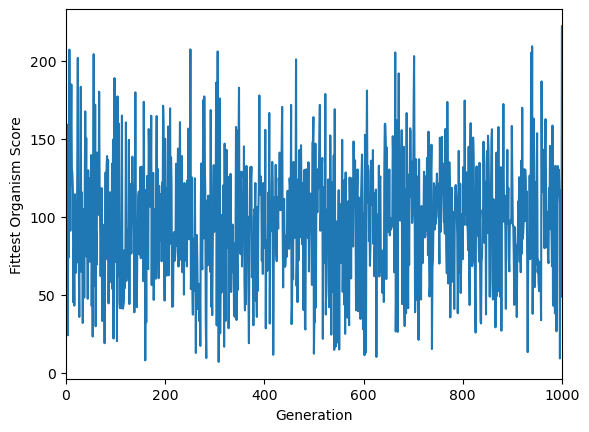

In [19]:
import matplotlib.pyplot as plt

fittest_agilities = []
best_scores = []

for i in range(num_generations):
    fittest_organism = sorted(population, key=fitness_function, reverse=True)[0]
    best_scores.append(fitness_function(fittest_organism))
    
plt.plot(best_scores)
plt.xlabel('Generation')
plt.ylabel('Fittest Organism Score')
plt.xlim(0,num_generations)
plt.show()